In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!unzip gdrive/MyDrive/RobaeeDataset.zip

In [ ]:
!pip install hazm

In [ ]:
!pip install --upgrade tensorflow

In [ ]:
!pip install -q sentencepiece
!pip install transformers

In [ ]:
import csv
import glob
import pandas as pd
import os
import numpy as np

In [ ]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dirpath = "./RobaeeDataset"
outputpath = 'datasetcsv.csv'
columns_name =["poem","poet"]
output = open(outputpath,'w')
csvout = csv.DictWriter(output,columns_name)
csvout.writeheader()
folders_name = os.listdir(dirpath);

for folder in folders_name:
  # print(folder)
  files = os.listdir(dirpath + '/' + folder)
  # print(files)

  for f in files :
    with open(dirpath + '/' + folder + '/' + f,encoding="utf8",errors="ignore")as afile:
      text_file = afile.read().replace('\n',' ')
      row = {'poem': text_file,'poet': folder}
      csvout.writerow(row)
output.close()

In [ ]:
df = pd.read_csv('datasetcsv.csv')
df

,poem,poet
0,در بتکده تا خیال معشوهٔ ما است رفتن به طواف ک...,moulavi
1,ای جان جهان جان و جهان باقی نیست جز عشق قدیم ...,moulavi
2,هر ذره که چون گرسنه بر خوان خداست گر تا باید ...,moulavi
3,ای دل تو و درد او که درمان اینست غم میخور و د...,moulavi
4,آن کان نبات و تنگ شکر نامد وان آب حیات بحر گو...,moulavi
...,...,...
2167,عاشق به یقین دان که مسلمان نبود در مذهب عشق ک...,abusaeed
2168,تا مدرسه و مناره ویران نشود این کار قلندری به...,abusaeed
2169,آنشب که مر از وصلت ای مه رنگست بالای شبم کوته ...,abusaeed
2170,گر زانکه هزار کعبه آزاد کنی به زان نبود که خا...,abusaeed


In [ ]:
# print missing values information
print('missing values stats')
print(df.isnull().sum(), '\n')

# print some missing values
print('some missing values')
print(df[df['poem'].isnull()], '\n')

missing values stats
poem    0
poet    0
dtype: int64 

some missing values
Empty DataFrame
Columns: [poem, poet]
Index: [] 



moulavi     724
attar       724
abusaeed    724
Name: poet, dtype: int64


<Axes: >

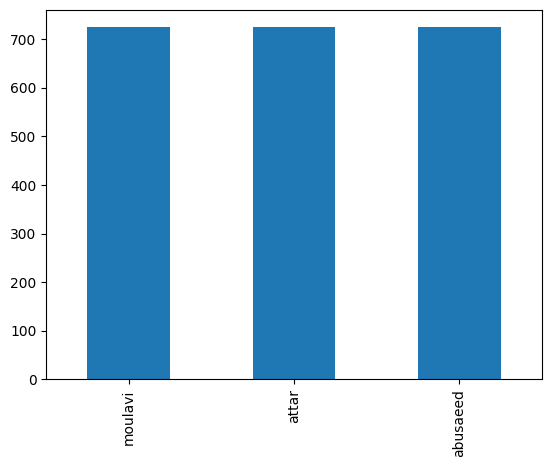

In [ ]:
count = df['poet'].value_counts()

print(count)
count.plot.bar()

In [ ]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.preprocessing import LabelEncoder

In [ ]:
import re
import hazm

In [ ]:
normalizer = hazm.Normalizer()
def cleaning(text):
    text = text.strip()
    # normalizing
    text = normalizer.normalize(text)

    # replacing all spaces,hyphens,  with white space
    space_pattern = r"[\xad\ufeff\u200e\u200d\u200b\x7f\u202a\u2003\xa0\u206e\u200c\x9d\]]"
    space_pattern = re.compile(space_pattern)
    text = space_pattern.sub(" ", text)

    # let's delete the un-required elements
    deleted_pattern = r"(\d|[\|\[]]|\"|'ٍ|[0-9]|¬|[a-zA-Z]|[؛“،,”‘۔’’‘–]|[|\.÷+\:\-\?»\=\{}\*«_…\؟!/ـ]|[۲۹۱۷۸۵۶۴۴۳]|[\\u\\x]|[\(\)]|[۰'ٓ۫'ٔ]|[ٓٔ]|[ًٌٍْﹼ،َُِّ«ٰ»ٖء]|\[]|\[\])"
    deleted_pattern = re.compile(deleted_pattern)
    text = deleted_pattern.sub("", text).strip()


    # removing wierd patterns
    wierd_pattern = re.compile("["
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u'\U00010000-\U0010ffff'
        # u"\0x06F0-\0x06F9"
        u"\u200d"
        u"\u200c"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\u3030"
        u"\ufe0f"
        u"\u2069"
        u"\u2066"
        u"\u2068"
        u"\u2067"
        "]+", flags=re.UNICODE)

    text = wierd_pattern.sub(r'', text)
    # removing extra spaces, hashtags
    text = re.sub("#", "", text)
    text = re.sub("\s+", " ", text)
    return text

df['cleaned_poems'] = df['poem'].apply(cleaning)
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df

,poem,poet
0,در بتکده تا خیال معشوه ما است رفتن به طواف کعب...,moulavi
1,ای جان جهان جان و جهان باقی نیست جز عشق قدیم ش...,moulavi
2,هر ذره که چون گرسنه بر خوان خداست گر تا باید خ...,moulavi
3,ای دل تو و درد او که درمان اینست غم میخور و دم...,moulavi
4,آن کان نبات و تنگ شکر نامد وان آب حیات بحر گوه...,moulavi
...,...,...
2167,عاشق به یقین دان که مسلمان نبود در مذهب عشق کف...,abusaeed
2168,تا مدرسه و مناره ویران نشود این کار قلندری به ...,abusaeed
2169,آنشب که مر از وصلت ای مه رنگست بالای شبم کوته ...,abusaeed
2170,گر زانکه هزار کعبه آزاد کنی به زان نبود که خاط...,abusaeed


In [ ]:
def stop_word_importer(file_name):# importing persian stopwords
    with open(file_name, 'r', encoding="utf8") as myfile:
        stop_words = myfile.read().replace('\n', ' ').replace("\u200c","").replace("\ufeff","").replace("."," ").split(' ')# a list of stop words
    return stop_words

In [ ]:
stop_words = stop_word_importer('stop_words.txt') # importing stop words to a list

In [ ]:
from hazm import stopwords_list

def removeStopWords(text):
  # text = ' '.join([word for word in text.split() if word not in stopwords_list()])
  text = ' '.join([word for word in text.split() if word not in stop_words])
  return text

df['cleaned_poems'] = df['poem'].apply(removeStopWords)
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df


,poem,poet
0,بتکده خیال معشوه طواف کعبه عین خطا کعبه بوی کن...,moulavi
1,جان جهان جان جهان باقی عشق قدیم شاهد ساقی کعبه...,moulavi
2,ذره گرسنه خوان خورند اینخوان برپاست خوان ازل خ...,moulavi
3,دل درد درمان اینست غم میخور مزن فرمان اینست پا...,moulavi
4,نبات تنگ شکر نامد وان آب حیات بحر گوهر نامد بر...,moulavi
...,...,...
2167,عاشق یقین مسلمان مذهب عشق کفر ایمان عشق دل عقل...,abusaeed
2168,مدرسه مناره ویران نشود کار قلندری سامان نشود ا...,abusaeed
2169,آنشب وصلت مه رنگست شبم کوته پهنا تنگست آنشب مس...,abusaeed
2170,کعبه آزاد خاطری شاد بنده لطف آزادی بنده,abusaeed


In [ ]:
df['cleaned_poems'] = df['poem'].apply(lambda t: normalizer.normalize(t))
df = df[['cleaned_poems', 'poet']]
df.columns = ['poem', 'poet']
df

,poem,poet
0,بتکده خیال معشوه طواف کعبه عین خطا کعبه بوی کن...,moulavi
1,جان جهان جان جهان باقی عشق قدیم شاهد ساقی کعبه...,moulavi
2,ذره گرسنه خوان خورند اینخوان برپاست خوان ازل خ...,moulavi
3,دل‌درد درمان اینست غم میخور مزن فرمان اینست پا...,moulavi
4,نبات تنگ شکر نامد وان آب حیات بحر گوهر نامد بر...,moulavi
...,...,...
2167,عاشق یقین مسلمان مذهب عشق کفر ایمان عشق دل عقل...,abusaeed
2168,مدرسه مناره ویران نشود کار قلندری سامان نشود ا...,abusaeed
2169,آنشب وصلت مه رنگست شبم کوته پهنا تنگست آنشب مس...,abusaeed
2170,کعبه آزاد خاطری شاد بنده لطف آزادی بنده,abusaeed


In [ ]:
labels = list(sorted(df['poet'].unique()))
labels

['abusaeed', 'attar', 'moulavi']

In [ ]:
df['label_id'] = df['poet'].apply(lambda t: labels.index(t))
df

,poem,poet,label_id
0,بتکده خیال معشوه طواف کعبه عین خطا کعبه بوی کن...,moulavi,2
1,جان جهان جان جهان باقی عشق قدیم شاهد ساقی کعبه...,moulavi,2
2,ذره گرسنه خوان خورند اینخوان برپاست خوان ازل خ...,moulavi,2
3,دل‌درد درمان اینست غم میخور مزن فرمان اینست پا...,moulavi,2
4,نبات تنگ شکر نامد وان آب حیات بحر گوهر نامد بر...,moulavi,2
...,...,...,...
2167,عاشق یقین مسلمان مذهب عشق کفر ایمان عشق دل عقل...,abusaeed,0
2168,مدرسه مناره ویران نشود کار قلندری سامان نشود ا...,abusaeed,0
2169,آنشب وصلت مه رنگست شبم کوته پهنا تنگست آنشب مس...,abusaeed,0
2170,کعبه آزاد خاطری شاد بنده لطف آزادی بنده,abusaeed,0


In [ ]:
label2id = {label: i for i, label in enumerate(labels)}
id2label = {v: k for k, v in label2id.items()}

print(f'label2id: {label2id}')
print(f'id2label: {id2label}')

label2id: {'abusaeed': 0, 'attar': 1, 'moulavi': 2}
id2label: {0: 'abusaeed', 1: 'attar', 2: 'moulavi'}


In [ ]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(df, test_size=0.2, random_state=1, shuffle=True)
val_data, test_data = train_test_split(test_data, test_size=0.1, random_state=1, shuffle=True)

In [ ]:
!pip install transformers

In [ ]:
from transformers import AutoConfig, AutoTokenizer

MODEL_NAME = 'm3hrdadfi/albert-fa-base-v2-clf-digimag'
# config = AutoConfig.from_pretrained(MODEL_NAME, **{
#         'label2id': label2id,
#         'id2label': id2label,
#     })
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

In [ ]:
SEQ_LEN = 128
BATCH_SIZE = 16
LEARNING_RATE = 2e-5

In [ ]:
tokens = tokenizer(train_data['poem'].tolist(), max_length=SEQ_LEN,
                  truncation=True, padding='max_length',
                  add_special_tokens=True,
                  return_tensors='tf')

In [ ]:
val_data_tokens = tokenizer(val_data['poem'].tolist(), max_length=SEQ_LEN,
                  truncation=True, padding='max_length',
                  add_special_tokens=True,
                  return_tensors='tf')

In [ ]:
test_data_tokens = tokenizer(test_data['poem'].tolist(), max_length=SEQ_LEN,
                  truncation=True, padding='max_length',
                  add_special_tokens=True,
                  return_tensors='tf')

In [ ]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

le = LabelEncoder()
y_train_le = le.fit_transform(train_data['label_id'])
y_valid_le  = le.fit_transform(val_data['label_id'])
y_test_le = le.fit_transform(test_data['label_id'])

hotlabels = to_categorical(y_train_le)
test_labels = to_categorical(y_test_le)
val_labels = to_categorical(y_valid_le)

In [ ]:
import tensorflow as tf

def map_func(input_ids, attention_mask, labels):
    return ({'input_ids': input_ids,
            'attention_mask': attention_mask}, labels)


train_dataset = tf.data.Dataset.from_tensor_slices((tokens['input_ids'], tokens['attention_mask'], hotlabels))
train_dataset = train_dataset.map(map_func)
train_dataset = train_dataset.shuffle(100).batch(BATCH_SIZE, drop_remainder=True)


val_dataset = tf.data.Dataset.from_tensor_slices((val_data_tokens['input_ids'], val_data_tokens['attention_mask'], val_labels))
val_dataset = val_dataset.map(map_func)
val_dataset = val_dataset.shuffle(100).batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
test_dataset = tf.data.Dataset.from_tensor_slices((test_data_tokens['input_ids'], test_data_tokens['attention_mask'], test_labels))
test_dataset = test_dataset.map(map_func)
test_dataset = test_dataset.shuffle(100).batch(BATCH_SIZE, drop_remainder=True)

In [ ]:
from transformers import TFAutoModel, TFAlbertForSequenceClassification
# AlBertmodel = TFAutoModel.from_pretrained(AlBert_base_model_path)

# AlBert_classification_model_path = 'm3hrdadfi/albert-fa-base-v2-clf-digimag'
classificationModel = TFAlbertForSequenceClassification.from_pretrained(MODEL_NAME)

Some layers from the model checkpoint at m3hrdadfi/albert-fa-base-v2-clf-digimag were not used when initializing TFAlbertForSequenceClassification: ['dropout_7']
- This IS expected if you are initializing TFAlbertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFAlbertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFAlbertForSequenceClassification were initialized from the model checkpoint at m3hrdadfi/albert-fa-base-v2-clf-digimag.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFAlbertForSequenceClassification for predictions without further training.


In [ ]:
input_ids = tf.keras.layers.Input(shape=(SEQ_LEN,), name='input_ids', dtype='int32')
mask = tf.keras.layers.Input(shape=(SEQ_LEN,), name='attention_mask', dtype='int32')

# embeddings = AlBertmodel(input_ids, attention_mask=mask)
classificationResult = classificationModel([input_ids, mask]).logits
# flatten_sent = tf.keras.layers.Flatten()(classificationResult)
Final_output = tf.keras.layers.Dense(3, activation ='softmax', trainable=True)(classificationResult)

In [ ]:
model = tf.keras.Model(inputs=[input_ids, mask], outputs=Final_output)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_ids (InputLayer)      [(None, 128)]                0         []                            
                                                                                                  
 attention_mask (InputLayer  [(None, 128)]                0         []                            
 )                                                                                                
                                                                                                  
 tf_albert_for_sequence_cla  TFSequenceClassifierOutput   1808896   ['input_ids[0][0]',           
 ssification (TFAlbertForSe  (loss=None, logits=(None,    7          'attention_mask[0][0]']      
 quenceClassification)       7),                                                              

In [ ]:
optimizer = tf.keras.optimizers.Adam(learning_rate=LEARNING_RATE) #decay=1e-6
loss = tf.keras.losses.CategoricalCrossentropy()
acc = tf.keras.metrics.CategoricalAccuracy('accuracy')

model.compile(optimizer=optimizer, loss=loss, metrics=[acc])

In [ ]:
history = model.fit(train_dataset, validation_data=val_dataset, epochs=5)

Epoch 1/5
108/108 [==============================] - 78s 506ms/step - loss: 1.0577 - accuracy: 0.4282 - val_loss: 0.9557 - val_accuracy: 0.5260
Epoch 2/5
108/108 [==============================] - 48s 444ms/step - loss: 0.8747 - accuracy: 0.5770 - val_loss: 1.0260 - val_accuracy: 0.4844
Epoch 3/5
108/108 [==============================] - 45s 420ms/step - loss: 0.6184 - accuracy: 0.7529 - val_loss: 1.0075 - val_accuracy: 0.5729
Epoch 4/5
108/108 [==============================] - 44s 406ms/step - loss: 0.3121 - accuracy: 0.9074 - val_loss: 1.2495 - val_accuracy: 0.5312
Epoch 5/5
108/108 [==============================] - 44s 404ms/step - loss: 0.1183 - accuracy: 0.9722 - val_loss: 1.1946 - val_accuracy: 0.5938


In [ ]:
test_loss, test_accuracy = model.evaluate(test_dataset)

2/2 [==============================] - 0s 158ms/step - loss: 1.1459 - accuracy: 0.5938


In [ ]:
print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

Test Loss: 1.1459
Test Accuracy: 0.5938


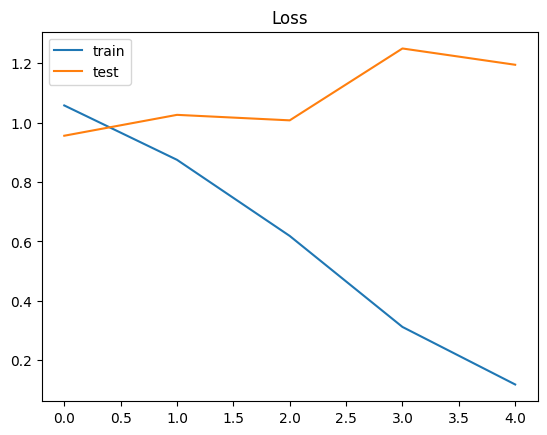

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show();

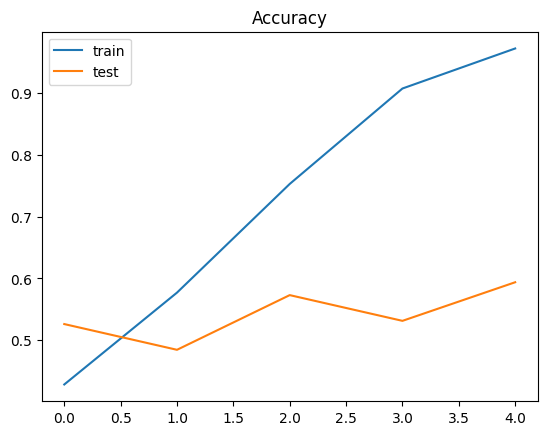

In [ ]:
plt.title('Accuracy')
plt.plot(history.history['accuracy'], label='train')
plt.plot(history.history['val_accuracy'], label='test')
plt.legend()
plt.show();

In [ ]:
def prep_data(text):
    tokens = tokenizer(text, max_length=SEQ_LEN, truncation=True, padding='max_length', add_special_tokens=True, return_tensors='tf')
    return ({'input_ids': tokens['input_ids'], 'attention_mask': tokens['attention_mask']})

In [ ]:
import numpy as np

test_data['predicted-label'] = None
# i = 0
for i, text in zip(test_data.index, test_data['poem']):
    tokens = prep_data(text)
    probs = model.predict(tokens)
    pred = np.argmax(probs)
    test_data['predicted-label'][i] = pred


1/1 [==============================] - 0s 54ms/step


<ipython-input-44-a47a631fb331>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['predicted-label'][i] = pred


1/1 [==============================] - 0s 55ms/step


In [ ]:
testlist = test_data['label_id'].tolist()
predlist = test_data['predicted-label'].tolist()

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score

print(classification_report(testlist, predlist, target_names=labels))

<Axes: >

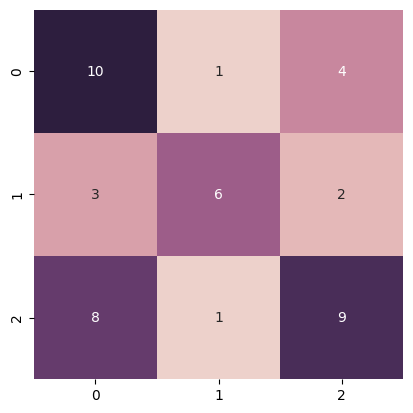

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sb
matrix_confusion = confusion_matrix(testlist, predlist)
sb.heatmap(matrix_confusion, square=True, annot=True, cmap=sb.cubehelix_palette(as_cmap=True)
, fmt='d', cbar=False)